In [10]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.utils.data as Data
import torchvision
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import roc_auc_score

In [11]:
# Mnist dataset
train_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=True,
    transform=torchvision.transforms.ToTensor(),
download=True)
test_data = torchvision.datasets.MNIST(
    root='./mnist/',
    train=False,
    transform=torchvision.transforms.ToTensor(),
    download=True)

torch.Size([60000, 28, 28])
torch.Size([60000])


/home/mht/anaconda3/envs/mpy/lib/python3.7/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


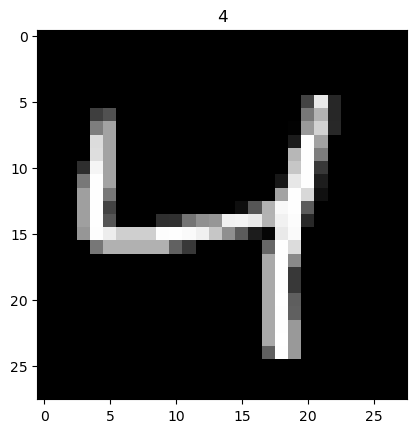

In [12]:
# plot one example
print(train_data.data.size())
print(train_data.train_labels.size())
plt.imshow(train_data.data[2].numpy(), cmap='gray')
plt.title('%i' % train_data.train_labels[2])
plt.show()

In [13]:
# Data loader, the batch shape is (50, 1, 28, 28)
train_loader = Data.DataLoader(dataset=train_data, batch_size=50, shuffle=True)
test_loader = Data.DataLoader(dataset=test_data, batch_size=50, shuffle=False)



In [14]:
class AE(nn.Module):
    def __init__(self):
        super(AE, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.Dropout()
        )
                
    def forward(self, x):
       output = self.encoder(x)
       return output


class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.FC = nn.Sequential(
            nn.Linear(256, 10),
            #nn.ReLU(),
           # nn.Dropout(0.3),
            #nn.Sigmoid()         
        )
    def forward(self, x):        
        return self.FC(x) 

In [16]:
autoencoder = AE()
clas = Classifier()
optimAE = torch.optim.Adagrad(autoencoder.parameters(), lr=0.005)
optimClass = torch.optim.Adagrad(clas.parameters(), lr=0.001)
clas_loss = nn.CrossEntropyLoss()


for it in range(1):
    
   
    
    for id, (x, y) in enumerate(train_loader):
        xx = Variable(x.view(-1, 28*28))
       # xy = Variable(x.view(-1, 28*28))
        target = Variable(y)
       
        
        autoencoder.train()
        clas.train()
        zx = autoencoder(xx)
        pred = clas(zx)
       # print(target.shape)
        loss = clas_loss(pred, target)
        
        y_true = target.view(-1,1)
        y_pred = pred.view(-1,1)
        
        
        optimAE.zero_grad()
        optimClass.zero_grad()
        
        loss.backward()
        
        optimAE.step()
        optimClass.step()
        flag = 1
    
    if flag == 1:
          
            print('Iter-{}; Train loss: {:.4}'.format(it, loss))
          
            
    loss , total, correct = 0, 0, 0
    with torch.no_grad():
        #AE.eval()
        #clas.eval()
        for x, y in test_loader:
            xx = Variable(x.view(-1, 28*28))
            target = Variable(y)
            zx = autoencoder(xx)
            pred = clas(zx)
            loss += clas_loss(pred, target)
            correct += (pred.argmax(1) == target).sum()
            total += x.size(0)
            
    loss = loss.item()/len(test_loader)
    acc = correct.item()/total
    
    print('Iter-{}; Test loss: {:.4}; ACC : {}'.format(it,loss, acc))
    
        

Iter-0; Train loss: 0.506
Iter-0; Test loss: 0.3751; ACC : 0.894
